In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal as ps
import libpysal as lps
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import shapely

from shapely import geometry as sgeom
from shapely.geometry import Point
import descartes as des
import pointpats 
from pointpats import PointPattern
from shapely import ops
from pointpats import PoissonPointProcess as ppp_csr

from pysal.model.spreg import ols
from pysal.model.spreg import ML_Error
from pysal.model.spreg import ML_Lag

# GWR prediction libraries
from pysal.model.mgwr.sel_bw import Sel_BW
from pysal.model.mgwr.gwr import GWR
# from pysal.contrib.glm.family import Gaussian
from scipy.stats import pearsonr

In [2]:
boroughs = gpd.read_file('London_Borough_Excluding_MHW.shp')

In [3]:
boroughName = list(boroughs.NAME)

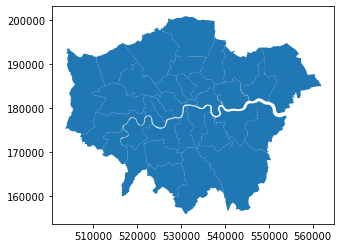

In [4]:
boroughs.plot()

In [5]:
priority = pd.read_csv('Priority Selection.csv')
priority = priority.replace('City of Westminster','Westminster')

In [6]:
from collections import Counter
priority = priority[priority['Borough'].notna()]
Counter(priority['Crime type'])
names = list(Counter(priority['Borough']))

In [7]:
crimeType = ['Total Burglary Offs',
 'Common Assault Offs',
 'Harassment Offs',
 'Non Domestic Abuse VWI Offs',
 'Personal Property Offs',
 'Theft from MV Offs',
 'Theft from Shops Offs',
 'Theft Taking of MV Offs',
 'TNO Offs',
 'Total Criminal Damage Offs',
 'Total Theft Person Offs',
 'ASB Calls']
pri2017 = pd.DataFrame(columns=crimeType)
pri2017['borough'] = list(boroughs.NAME)
pri2017.set_index('borough',inplace=True)

In [8]:
crimeType = ['Total Burglary Offs',
 'Common Assault Offs',
 'Harassment Offs',
 'Non Domestic Abuse VWI Offs',
 'Personal Property Offs',
 'Theft from MV Offs',
 'Theft from Shops Offs',
 'Theft Taking of MV Offs',
 'TNO Offs',
 'Total Criminal Damage Offs',
 'Total Theft Person Offs',
 'ASB Calls']
pri2018 = pd.DataFrame(columns=crimeType)
pri2018['borough'] = list(boroughs.NAME)
pri2018.set_index('borough',inplace=True)

In [9]:
crimeType = ['Total Burglary Offs',
 'Common Assault Offs',
 'Harassment Offs',
 'Non Domestic Abuse VWI Offs',
 'Personal Property Offs',
 'Theft from MV Offs',
 'Theft from Shops Offs',
 'Theft Taking of MV Offs',
 'TNO Offs',
 'Total Criminal Damage Offs',
 'Total Theft Person Offs',
 'ASB Calls']
pri2019 = pd.DataFrame(columns=crimeType)
pri2019['borough'] = list(boroughs.NAME)
pri2019.set_index('borough',inplace=True)

In [17]:
for i in range(len(priority)):
    name = priority.iloc[i,0]
    crimetype = priority.iloc[i,1]
    pri17 = priority.iloc[i,3]
    pri18 = priority.iloc[i,4]
    pri19 = priority.iloc[i,5]
#    print(name,crimetype,pri17,pri18,pri19)
    if pri17 == 'Yes'or pri17 == 'Mandatory':
        pri2017.loc[name][crimetype] = 1
    else:
        pri2017.loc[name][crimetype] = 0
    if pri18 == 'Yes'or pri18 == 'Mandatory':
        pri2018.loc[name][crimetype] = 1
    else:
        pri2018.loc[name][crimetype] = 0
    if pri19 == 'Yes'or pri19 == 'Mandatory':
        pri2019.loc[name][crimetype] = 1
    else:
        pri2019.loc[name][crimetype] = 0

In [18]:
pri2017 = pri2017.fillna(0)
pri2017.to_csv('priority2017.csv')

In [19]:
pri2018 = pri2018.fillna(0)
pri2018.to_csv('priority2018.csv')

In [21]:
pri2019 = pri2019.fillna(0)
pri2019.to_csv('priority2019.csv')

In [22]:
pri2017['year'] = 2017
pri2018['year'] = 2018
pri2019['year'] = 2019
priTotal = pd.concat([pri2017,pri2018,pri2019])
priTotal.to_csv('priTotal.csv')

In [ ]:
gdf2017 = pd.merge(boroughs,pri2017,how='left',left_on='NAME',right_index=True)
f,ax = plt.subplots(3,4,figsize=(20,12))
plt.suptitle('Distribution or Priority Selection in 2017/18',size=30)
ind = 0
for i in range(3):
    for j in range(4):
        ax[i,j].set_axis_off()
        ax[i,j].set_title(crimeType[ind])
        gdf2017.plot(column=crimeType[ind],cmap='OrRd',ax=ax[i,j])
        ind = ind + 1

plt.savefig('priority_distribution_2017.png')
plt.show()

In [ ]:
gdf2018 = pd.merge(boroughs,pri2018,how='left',left_on='NAME',right_index=True)
f,ax = plt.subplots(3,4,figsize=(20,12))
plt.suptitle('Distribution or Priority Selection in 2018/19',size=30)
ind = 0
for i in range(3):
    for j in range(4):
        ax[i,j].set_axis_off()
        ax[i,j].set_title(crimeType[ind])
        gdf2018.plot(column=crimeType[ind],cmap='OrRd',ax=ax[i,j])
        ind = ind + 1

plt.savefig('priority_distribution_2018.png')
plt.show()

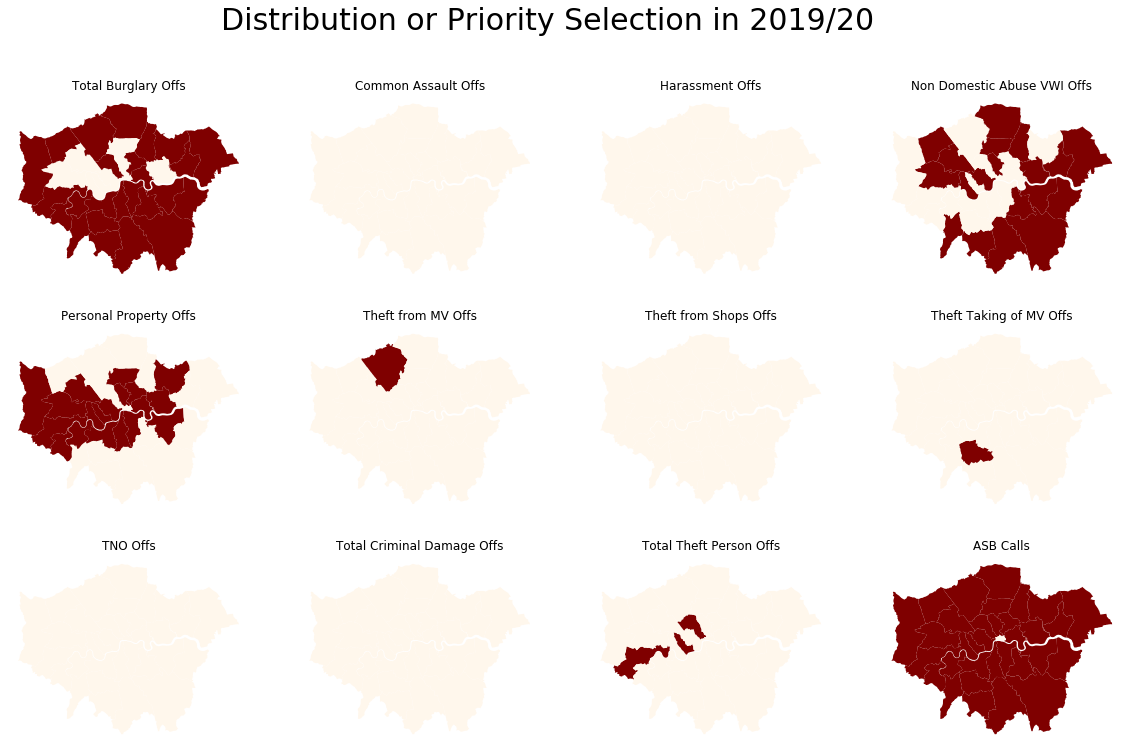

In [150]:
gdf2019 = pd.merge(boroughs,pri2019,how='left',left_on='NAME',right_index=True)
f,ax = plt.subplots(3,4,figsize=(20,12))
plt.suptitle('Distribution or Priority Selection in 2019/20',size=30)
ind = 0
for i in range(3):
    for j in range(4):
        ax[i,j].set_axis_off()
        ax[i,j].set_title(crimeType[ind])
        gdf2019.plot(column=crimeType[ind],cmap='OrRd',ax=ax[i,j])
        ind = ind + 1

plt.savefig('priority_distribution_2019.png')
plt.show()

In [160]:
gdf2017.to_file('priority2017.shp')
gdf2018.to_file('priority2018.shp')
gdf2019.to_file('priority2019.shp')